In [293]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from adjustText import adjust_text
import re
from scripts.analysis_helper_functions import helper_functions as hf
from source.load_sbml.sbml_load import *
from source.load_sbml.sbml_model import SBMLModel
import seaborn as sns
from scipy.stats import zscore

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [297]:

## try the cosine similarity for the log data
def euclidean_distance(true_params,optimized_params):
    """Calculates the euclidean distance in log space between true and optimized parameters"""
    
    # true_params = {key: value + 1 for key, value in true_params.items()}
    # optimized_params = {key: value + 1 for key, value in optimized_params.items()}
    
    true_params=pd.Series(true_params)
    optimized_params=pd.Series(optimized_params)

    # # # # # # # #add a very small value to the 0 values

    
    # true_params=true_params
    
    # optimized_params=optimized_params
    
    
    #log-transform and calculate log-euclidean distance
    # true_params=np.log2(true_params)
    # optimized_params=np.log2(optimized_params)
    true_params=zscore(true_params)
    optimized_params=zscore(optimized_params)

    distance=np.sqrt(np.sum(true_params.subtract(optimized_params)**2))
    return distance


# cos_sim = dot(a, b)/(norm(a)*norm(b))
def cosine_similarity(true_params,optimized_params):
    """"Calculates the cosine similarity (in log space) between true and optimized parameters"""

    # true_params = {key: value + 1 for key, value in true_params.items()}
    # optimized_params = {key: value + 1 for key, value in optimized_params.items()}

    keys = set(true_params.keys()).union(set(optimized_params.keys()))
    
    # Create vectors
    true_params = np.array([true_params.get(key, 0) for key in keys])
    optimized_params = np.array([optimized_params.get(key, 0) for key in keys])


    # true_params=np.log2(true_params)
    # optimized_params=np.log2(optimized_params)

    cos_sim = np.dot(true_params, optimized_params)/(np.linalg.norm(true_params)*np.linalg.norm(optimized_params))
    return cos_sim

In [295]:
model_names=os.listdir("results/EXP1_initialization_bounds_lhs")

results_dir="results/EXP1_initialization_bounds_lhs/"

model_names=["Becker_Science2010"]
for model_name in model_names:
    results_dir="results/EXP1_initialization_bounds_lhs/"+model_name+"/"
    file_list=os.listdir(results_dir)
    loss_dfs,params_dfs,norms_dfs=hf.retrieve_convergence_results(results_dir,file_list)
    # model_success_dict[model_name]=hf.retrieve_success_rate(loss_dfs,model_name)

11:46:29,220 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:29,220 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:29,221 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:29,221 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:29,221 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:29,221 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:29,221 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:29,222 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3


11:46:29,456 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:29,457 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:29,457 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:29,458 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:29,458 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:29,459 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:29,459 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:29,459 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3
11:46:29,684 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:29,685 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:29,685 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:29,685 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:29,685 - source.load_sbml.sbml_m

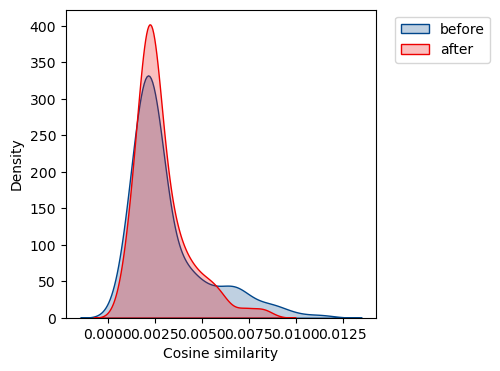

11:46:30,051 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:30,052 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:30,052 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:30,052 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:30,053 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:30,053 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:30,053 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:30,054 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3
11:46:30,320 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:30,320 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:30,320 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:30,321 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:30,321 - source.load_sbml.sbml_m

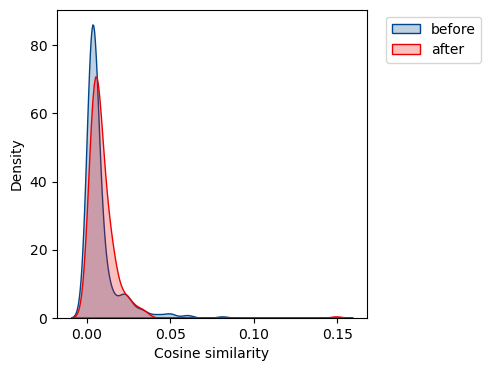

11:46:30,932 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:30,933 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:30,933 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:30,933 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:30,934 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:30,934 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:30,934 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:30,935 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3
11:46:31,189 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:31,189 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:31,189 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:31,190 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:31,190 - source.load_sbml.sbml_m

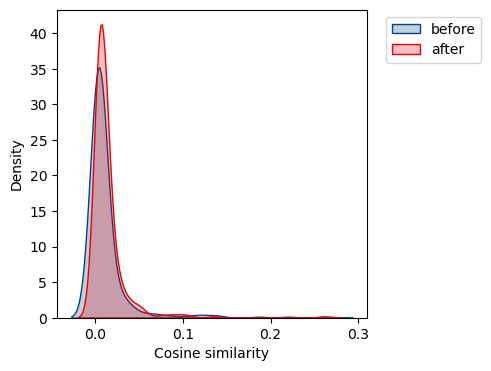

11:46:31,771 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:31,772 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:31,772 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:31,773 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:31,773 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:31,773 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:31,773 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:31,774 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3
11:46:32,019 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:32,020 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:32,020 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:32,020 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:32,020 - source.load_sbml.sbml_m

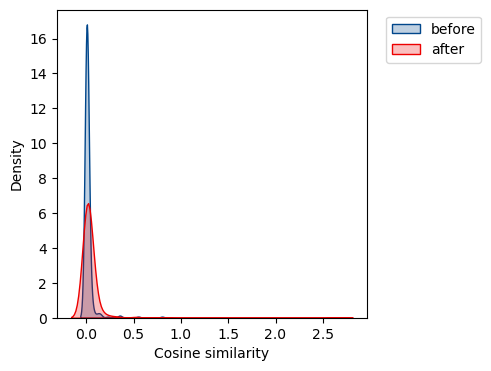

11:46:32,631 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:32,631 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:32,632 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:32,632 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:32,632 - source.load_sbml.sbml_model - INFO -  number of global parameters: 17
11:46:32,633 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
11:46:32,633 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
11:46:32,633 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 3
11:46:32,910 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
11:46:32,910 - source.load_sbml.sbml_model - INFO - Model loaded.
11:46:32,911 - source.load_sbml.sbml_model - INFO -  number of species: 6
11:46:32,911 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
11:46:32,911 - source.load_sbml.sbml_m

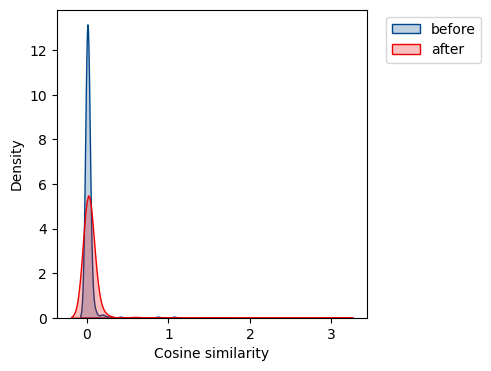

In [298]:






bounds=['bounds_2.csv','bounds_5.csv','bounds_10.csv','bounds_50.csv','bounds_100.csv']

colors=['#00468BFF',"#ED0000FF","#925E9FFF","#AD002AFF","#ADB6B6FF"]
# for k,bound in enumerate(bounds):





runs=['run_1','run_2','run_3']

for bound in bounds:
    fig,ax=plt.subplots(figsize=(4,4))
    dist_init=[]
    dist_training=[]
    dist_succesful=[]
    for runid in runs:

        model_name="Becker_Science2010"



        #retrieve true parameters
        filepath = ("models/sbml_models/working_models/"+model_name+".xml")
        model=SBMLModel(file_path=filepath)
        params = get_global_parameters(model.model)
        true_params = {**model.local_params, **params}

        max_dist=[]




        file_name_trained=f"{model_name}_parameters_id_lhs_N=100{runid}{bound}"
        file_name_init=f"parameter_initializations/{model_name}/{model_name}_parameterset_id_lhs_N=100{runid}{bound}"
        file_name_loss=f"{model_name}_losses_id_lhs_N=100run_1{bound}"


        # retrieve parameters from initializations
        parameter_initializations=pd.read_csv(file_name_init,index_col=0).T

        loss_df=loss_dfs[file_name_loss]
        params_df=params_dfs[file_name_trained]

        #subset succesful parameterization (loss<1e-3)
        # succesful_parameters=loss_df.iloc[:,np.where(np.abs(loss_df)<=0.001)[1]].columns.to_list()
        # succesful_params=params_df[succesful_parameters]

        #calculate distance between initialization and true params
        
        for k,colname in enumerate(parameter_initializations.columns):
            dist=euclidean_distance(true_params,parameter_initializations[k].to_dict())
            dist_init.append(dist)



        for k,colname in enumerate(params_df.columns):
            dist=euclidean_distance(true_params,params_df[colname].to_dict())
            dist_training.append(dist)


        # for k,colname in enumerate(succesful_params.columns):
        #     dist=cosine_similarity(true_params,succesful_params[colname].to_dict())
        #     dist_succesful.append(dist)

    dist_init=np.array(dist_init)
    dist_training=np.array(dist_training)
    dist_succesful=np.array(dist_succesful)

    sns.kdeplot(dist_init,fill=True,label="before",color="#00468BFF")
    sns.kdeplot(dist_training,fill=True,label="after",color="#ED0000FF")
    sns.kdeplot(dist_succesful,fill=True,label="succesfull",color="#925E9FFF")
    ax.legend(bbox_to_anchor=(1.04,1),loc="upper left")
    plt.xlabel("Cosine similarity")
    # plt.xlim(0,1)
    # plt.xlabel("Log Euclidean distance")
    plt.show()

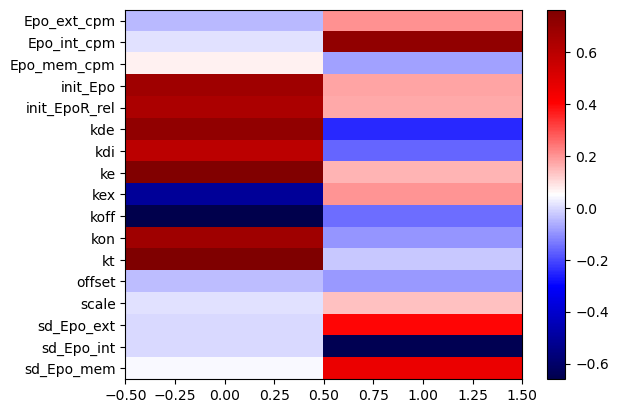

Text(0, 0.5, 'PC2')

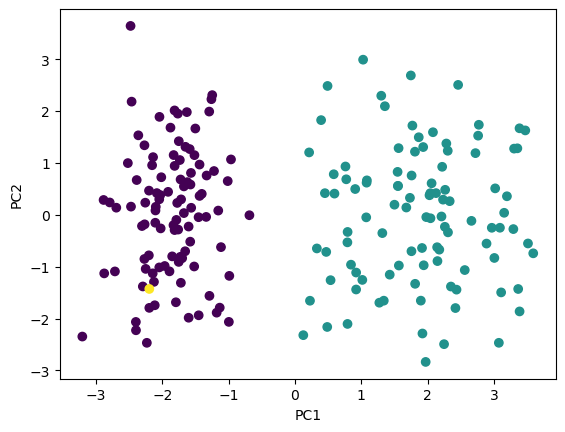

In [300]:
## Figure out what seperates the learned and initial parameters the most
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


labels=np.zeros(np.shape(parameter_initializations)[1])
labels2=np.ones(np.shape(params_df)[1])

labels3=np.array([2])
labels=np.concatenate([labels,labels2,labels3])

# +[0]*np.shape(parameter_initializations)[1]
params=pd.concat([params_df,parameter_initializations,pd.Series(true_params)],axis=1).T


lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(params, labels).transform(params)
# sns.kdeplot(X_r2)
pca = PCA(n_components=2)
scaler=StandardScaler()
scaled_data=scaler.fit_transform(params)

X_embedded=pca.fit_transform(scaled_data)



# fig,ax=plt.subplots(figsize=)
plt.imshow(pca.components_.T*np.sqrt(pca.explained_variance_),aspect="auto",cmap="seismic")
plt.yticks(np.arange(0,len(params.columns.to_list())),params.columns.to_list())
plt.colorbar()
plt.show()


plt.scatter(X_embedded[:,0],X_embedded[:,1],c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")


In [164]:
for i,k in enumerate(params_dfs[file_name_trained].index.tolist()):

    if k == list(parameter_initializations[0].to_dict().keys())[i]:
        continue
    else:
        print("no")

    



# list(parameter_initializations[k].to_dict().keys())



no
no
no
no
no
no
no
no
no
no
no
no
no
